What is Clustering?

Clustering is a way to group things that are similar to each other. It's like sorting your toys or books into different piles based on how similar they are. For example, you might put all your stuffed animals in one group, all your cars in another, and all your action figures in another.

- There are two main types of clustering:
Hierarchical Clustering (which groups things step by step, like making a tree of groups).
Non-Hierarchical Clustering (which groups things directly into a set number of groups).

- Hierarchical vs. Non-Hierarchical Clustering
Hierarchical Clustering: In this method, you don’t decide how many groups you need at first. Instead, you start with each item in its own group, and then combine them into bigger groups as you go along, like building a tree. You pick the number of groups later.
Non-Hierarchical Clustering (like K-means): This method is different. Before you start, you decide how many groups (or clusters) you want. One popular method for this is called K-means. In K-means, you pick K random starting points, and then group everything based on how close it is to those starting points.

- K-means Clustering
K-means is a type of non-hierarchical clustering. You pick K random points to start with, and then keep moving those points around until each data point (like each toy or book) belongs to the group that's closest to the starting point.
The number of groups (K) is something you decide ahead of time. If you want 3 groups, then K=3.
Centroid: The center point of each group. It’s like finding the middle of a cluster of things to figure out where the "center" is.

- Evaluating Clusters
Once we’ve grouped things, we need to check if the groups make sense. We use special measures to see how well the clusters work, like:
Silhouette Score: This tells us how well each point fits into its cluster.
Dunn Index: This checks how far apart the clusters are from each other.


1.  Non-Hierarchical Clustering : KMeans

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans

from sklearn.datasets import load_wine
dataset = load_wine()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df = data.copy()

In [35]:
# KMeans Fit

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [36]:
# KMeans Predict

pred = kmeans.predict(df)
pred

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [37]:
# KMeans Evaluation

df['target'] = dataset.target
df['pred']= pred 
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,2


In [38]:
# PCA - Clustering - Visualizing

from sklearn.decomposition import PCA

dfp = data.copy()
pca = PCA(n_components=2)
dfp = pca.fit_transform(dfp)
dfp = pd.DataFrame(dfp)
dfp.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [39]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfp)
pred = kmeans.predict(dfp)
dfp['kmeans'] = pred 
dfp
dfp.head()

,0,1,kmeans
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,2


In [40]:
## Centroid 

centers = kmeans.cluster_centers_

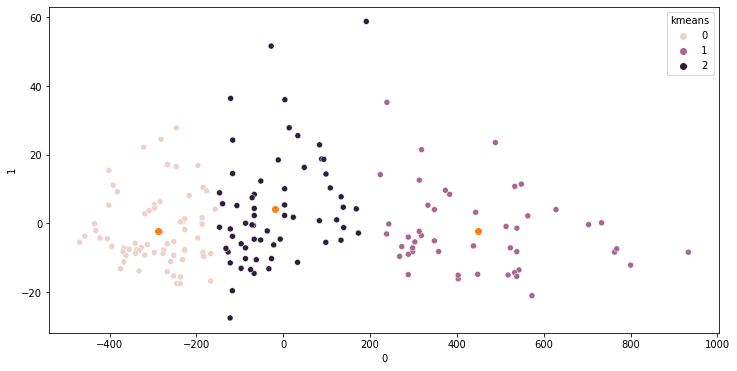

In [41]:
## Visualization

plt.figure(figsize=(12,6))
sns.scatterplot(x=dfp.iloc[:,0], y=dfp.iloc[:,1], hue=dfp['kmeans'])
plt.scatter(centers[:,0], centers[:,1])

2) Elbow Method 

- What is the Elbow Method?
Imagine you are sorting your toys into groups, and you start with just one group (the whole pile of toys). You keep adding more groups, one by one, and check how well the toys fit into those groups. The goal is to find the best number of groups where the toys fit well and you don’t have too many or too few groups.

When you make a plot (like a graph) showing how much the toys fit (we call this inertia or sum of squared errors) as you add more groups, you’ll start to see a curve. The elbow of the curve is where adding more groups doesn’t make things much better.
The "elbow" is the point where the curve starts to flatten out, meaning that adding more groups doesn’t improve the grouping very much.

- How Does It Work?
Start with one group and calculate how well the toys fit into that group.
Add more groups (two, three, four, etc.) and calculate how well the toys fit into those.
Plot this on a graph: The x-axis shows the number of groups, and the y-axis shows how well the toys fit into the groups (lower is better).
The elbow point on the graph is where you should stop — it’s the best number of groups for your data.

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:1673: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklea

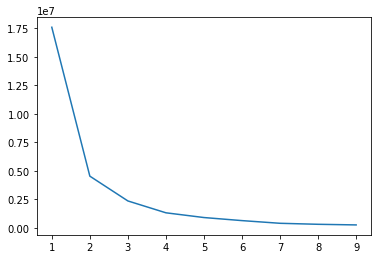

In [44]:
inertia =[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=2024)
    kmeans.fit(dfp)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,10), inertia)

2. Hierarchical Clustering : Dendrogram

In [45]:
from scipy.cluster.hierarchy import dendrogram, ward

In [49]:
# PCA

dfd = data.copy()
pca = PCA(n_components =2)
dfd = pca.fit_transform(dfd)
dfd = pd.DataFrame(dfd)
dfd.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [52]:
# Sampling

kdata = df[:3].copy()
kdata = kdata.append(df[70:73])
kdata = kdata.append(df[160:163])
kdata

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pred
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185.0,0,1
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,1,2
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.360,3.16,410.0,1,0
72,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.980,2.78,472.0,1,0
160,12.36,3.83,2.38,21.0,88.0,2.30,0.92,0.50,1.04,7.65,0.560,1.58,520.0,2,0
161,13.69,3.26,2.54,20.0,107.0,1.83,0.56,0.50,0.80,5.88,0.960,1.82,680.0,2,2
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.870,2.11,570.0,2,0


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [75.0, 75.0, 85.0, 85.0],
  [43.75, 43.75, 80.0, 80.0],
  [12.5, 12.5, 61.875, 61.875]],
 'dcoord': [[0.0, 31.265012394048398, 31.265012394048398, 0.0],
  [0.0, 148.06408409874425, 148.06408409874425, 31.265012394048398],
  [0.0, 48.36306131749726, 48.36306131749726, 0.0],
  [0.0, 88.0907571769025, 88.0907571769025, 48.36306131749726],
  [0.0, 135.98401505324074, 135.98401505324074, 88.0907571769025],
  [0.0, 190.0819828810716, 190.0819828810716, 0.0],
  [135.98401505324074,
   461.05187738547016,
   461.05187738547016,
   190.0819828810716],
  [148.06408409874425,
   1026.449386397162,
   1026.449386397162,
   461.05187738547016]],
 'ivl': ['2', '0', '1', '4', '8', '5', '6', '3', '7'],
 'leaves': [2, 0, 1, 4, 8, 5, 6, 3, 7],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C

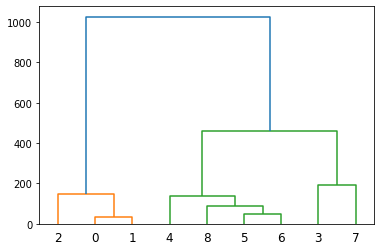

In [54]:
# Dendrogram 

linkage = ward(kdata)
dendrogram(linkage)